**Understanding the problem**

This data set consists of Placement data of students in a XYZ campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students. Link to the dataset https://www.kaggle.com/benroshan/factors-affecting-campus-placement

**Understanding the dataset**


There are total 12 features (Independent variable) in the dataset to classify the likelihood status of the student in placement (status and salary are Dependent Variable). Those are listed as follows,

1.   **gender** : Candidate gender --> Male='M',Female='F'

2.   **ssc_p** : SSC (10th) Percentage

3.   **ssc_b** : SSC Board of Education --> Central (or) Others

4.  **hsc_p** : HSC (12th) percentage

5. **hsc_b** : HSC Board of Education --> Central/ Others

6. **hsc_s** : Specialization in HSC

7. **degree_p** : Degree Percentage

8. **degree_t** : Under Graduation (Degree type)- Field of degree education

9. **workex** : Work Experience

10. **etest_p** : Employability test percentage ( conducted by college)

11. **specialisation** : Post Graduation(MBA)- Specialization

12. **mba_p** : MBA percentage

13. **status** : Status of placement- Placed/Not placed

14. **salary** : Salary offered by corporate to candidates

**Importing the Necessary libraries**

In [3]:
pip install shap


  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)


In [2]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from imblearn.over_sampling import SMOTE

from sklearn import tree
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Importing the Data**

In [3]:
df=pd.read_csv('Placement_Data_Full_Class.csv')
df.drop(['sl_no'],inplace=True,axis=1)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


**Data Analysis**

In [4]:
df.shape

(215, 14)

In [5]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [7]:
#Sepearating the categorical,numeric and target features
categorical_feature=['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation']
numeric_feature=['ssc_p','hsc_p','degree_p','etest_p','mba_p']
target_variable=['status']

**Data Visualization**

**For Categorical Features**

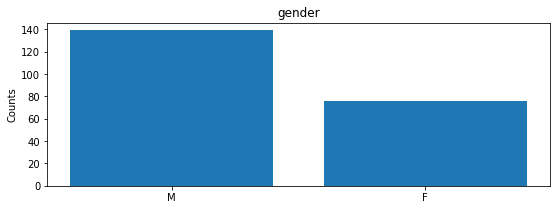

M    139
F     76
Name: gender, dtype: int64


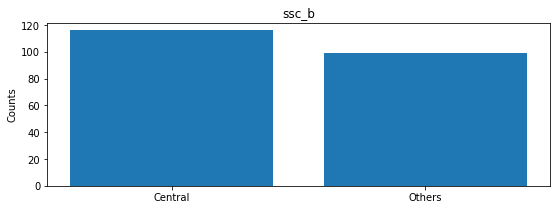

Central    116
Others      99
Name: ssc_b, dtype: int64


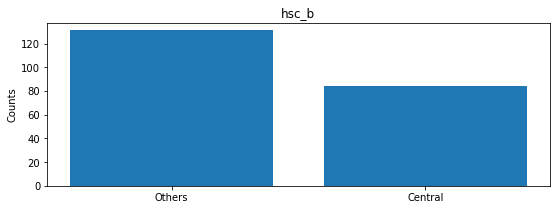

Others     131
Central     84
Name: hsc_b, dtype: int64


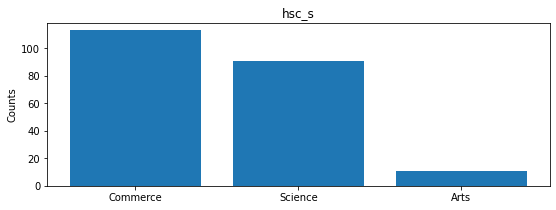

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64


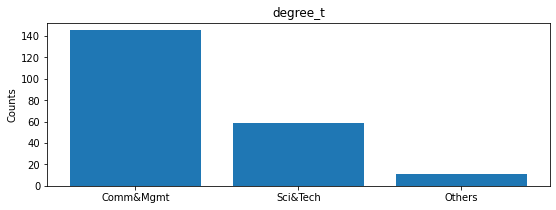

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64


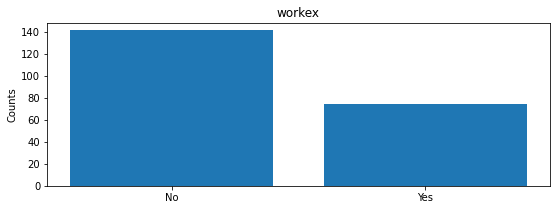

No     141
Yes     74
Name: workex, dtype: int64


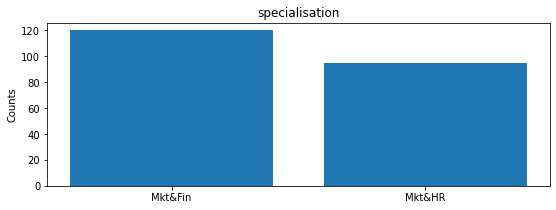

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64


In [8]:
for feature in categorical_feature:
    var = df[feature]
    count = var.value_counts()
    plt.figure(figsize=(9,3))
    plt.bar(count.index, count)
    plt.xticks(count.index, count.index.values)
    plt.ylabel("Counts")
    plt.title(feature)
    plt.show()
    print(count)

**For Numerical Columns**

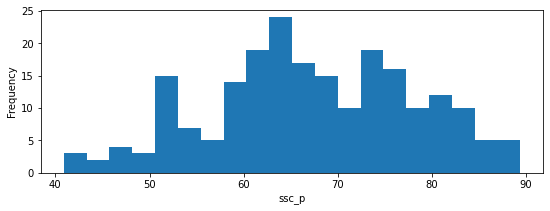

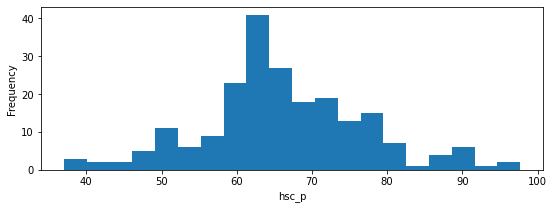

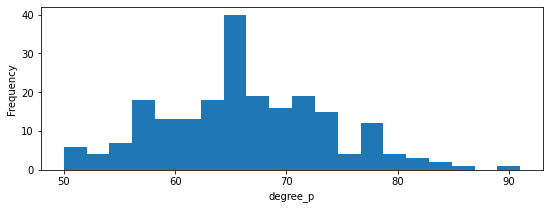

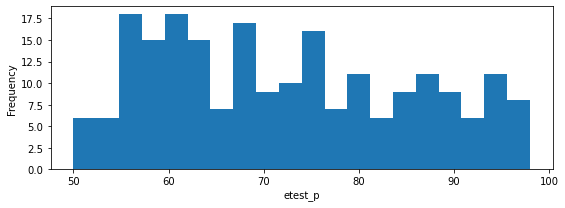

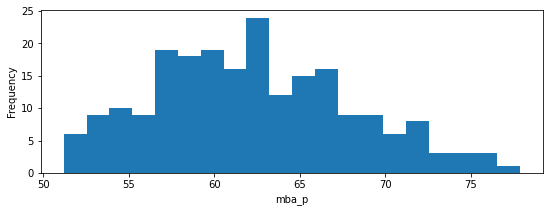

In [9]:
for feature in numeric_feature:
    plt.figure(figsize=(9,3))
    plt.hist(df[feature], bins=20)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

**For Target Variable**

In [10]:
Not_Placed = df[df['status']=='Not Placed']['status'].count()
Placed = df[df['status']=='Placed']['status'].count()
Placed_percent = Placed/(Placed+Not_Placed)
Not_Placed_percent = Not_Placed/(Placed+Not_Placed)

print('Total Number of Not Placed Students:',Not_Placed)
print('Total Number of Placed Students:',Placed)
print('Percentage of Not Placed Students:',Not_Placed_percent*100,'%')
print('Percentage of Placed Students:',Placed_percent*100,'%')

Total Number of Not Placed Students: 67
Total Number of Placed Students: 148
Percentage of Not Placed Students: 31.16279069767442 %
Percentage of Placed Students: 68.83720930232559 %


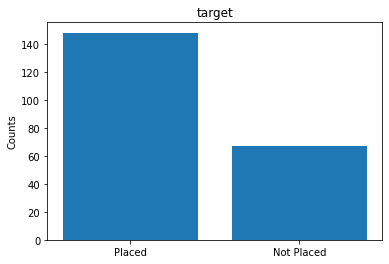

In [11]:
var = df['status']
count = var.value_counts()
plt.bar(count.index, count)
plt.xticks(count.index, count.index.values)
plt.ylabel("Counts")
plt.title('target')
plt.show()

In [12]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

**Pair wise Bivariate Relationships**

Dataset has 0 variance; skipping density estimate.


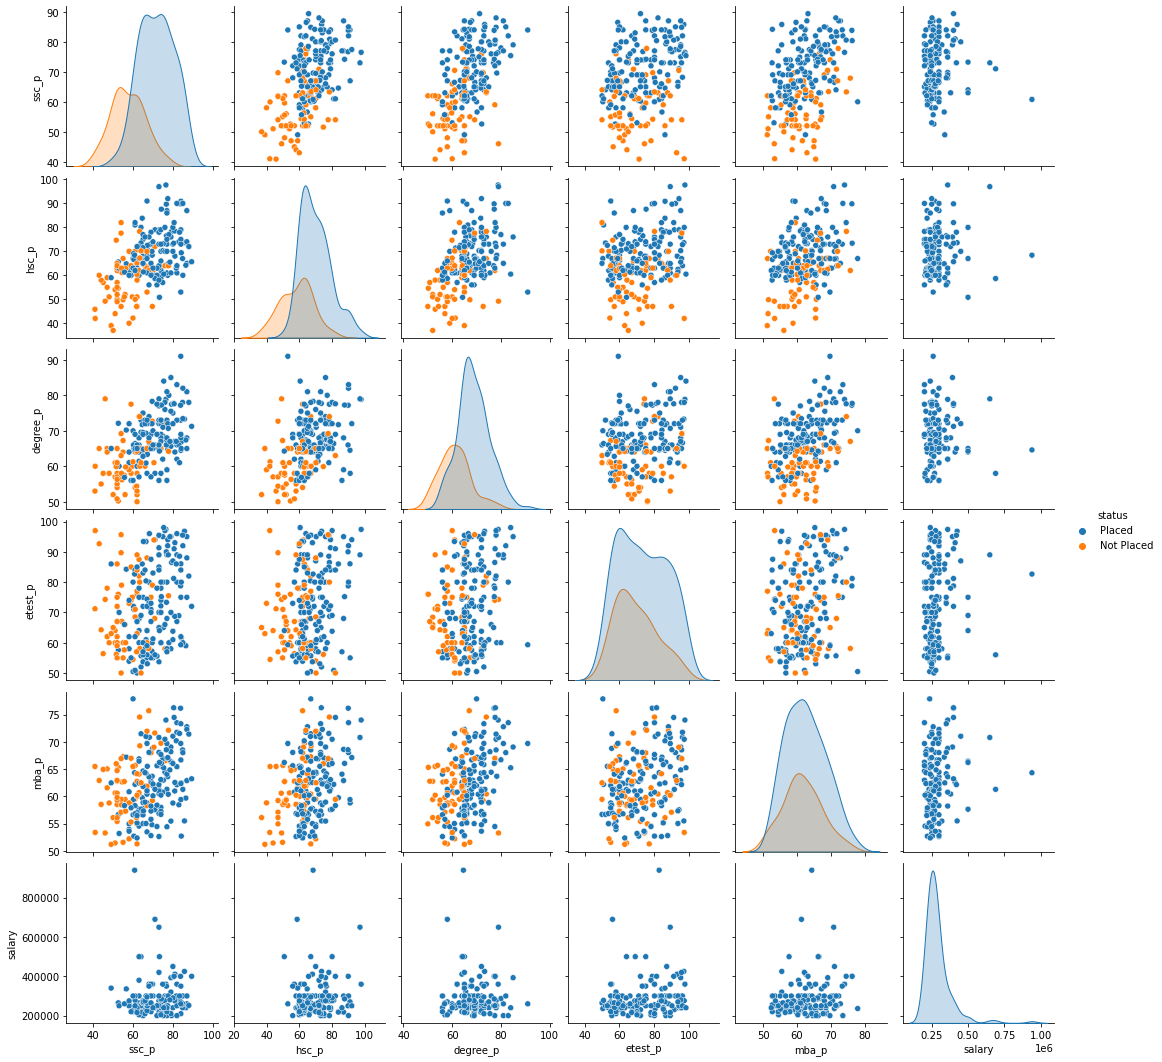

In [13]:
sns.pairplot(df,hue='status')
plt.show()

**Data Imputation**

<AxesSubplot:>

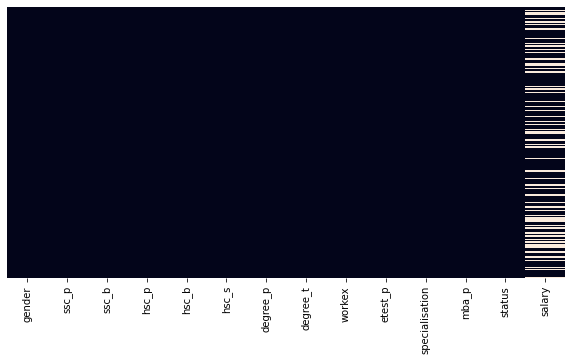

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [15]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [16]:
df['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:',df['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
0


**Feature Engineering**

In [17]:
df.duplicated().sum()

0

**Preprocessing categorical Columns**

**Label Encoding**

We perform label encoding for binary features and One hot encoding for features with more than 2 classes

In [18]:
object_cols=['gender','workex','specialisation','status','ssc_b','hsc_b']
label_encoder = LabelEncoder()

encoded_data=df.copy()
for col in object_cols:
    encoded_data[col] = label_encoder.fit_transform(encoded_data[col])
encoded_data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [19]:
dummy_hsc_s=pd.get_dummies(encoded_data['hsc_s'],drop_first=True)
dummy_degree_t=pd.get_dummies(encoded_data['degree_t'], drop_first=True)
encoded_data = pd.concat([encoded_data,dummy_hsc_s,dummy_degree_t],axis=1)
encoded_data.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)
encoded_data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Commerce,Science,Others,Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,1,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,0,1,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,0,0,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,1,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,1,0,0,0


In [20]:
encoded_data.corr()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Commerce,Science,Others,Sci&Tech
gender,1.000000,-0.068969,0.019429,-0.021334,0.065945,-0.173217,0.085153,0.084294,-0.106160,-0.300531,0.090670,-0.001087,0.042682,-0.093246,0.084072
ssc_p,-0.068969,1.000000,0.116194,0.511472,0.066996,0.538404,0.175675,0.261993,-0.172536,0.388478,0.607889,-0.101323,0.189847,-0.066127,0.221235
ssc_b,0.019429,0.116194,1.000000,-0.137013,0.605883,0.038070,-0.040744,-0.018991,-0.051565,0.083120,0.037297,-0.056671,0.058505,-0.002758,0.101060
hsc_p,-0.021334,0.511472,-0.137013,1.000000,-0.019548,0.434206,0.141025,0.245113,-0.241630,0.354823,0.491228,0.258093,-0.226675,-0.131382,-0.053599
hsc_b,0.065945,0.066996,0.605883,-0.019548,1.000000,0.067229,0.038357,0.039108,0.002232,0.090201,0.016945,-0.073522,0.126446,-0.116920,0.086548
degree_p,-0.173217,0.538404,0.038070,0.434206,0.067229,1.000000,0.122648,0.224470,-0.218286,0.402364,0.479861,-0.022724,0.092006,-0.180408,0.123477
workex,0.085153,0.175675,-0.040744,0.141025,0.038357,0.122648,1.000000,0.056735,-0.191174,0.168811,0.276060,-0.056719,0.033270,0.009507,0.102962
etest_p,0.084294,0.261993,-0.018991,0.245113,0.039108,0.224470,0.056735,1.000000,-0.236315,0.218055,0.127639,-0.021732,0.055352,0.006907,0.009748
specialisation,-0.106160,-0.172536,-0.051565,-0.241630,0.002232,-0.218286,-0.191174,-0.236315,1.000000,-0.105728,-0.250655,-0.129985,0.166639,0.090948,0.061503
mba_p,-0.300531,0.388478,0.083120,0.354823,0.090201,0.402364,0.168811,0.218055,-0.105728,1.000000,0.076922,-0.049415,0.048050,-0.036055,0.125009


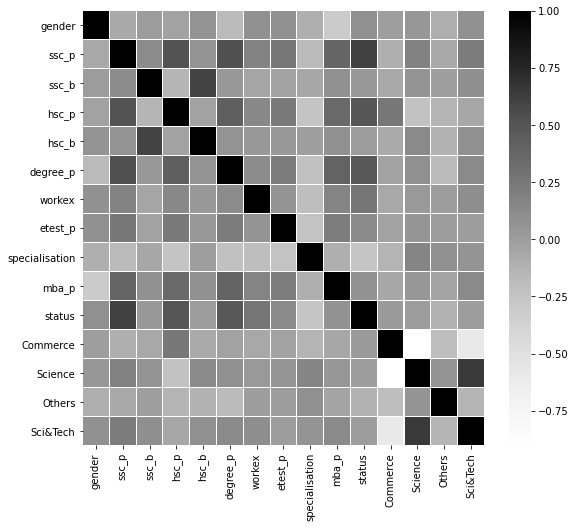

In [21]:
corr = encoded_data.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr, ax = ax, cmap ="Greys", linewidths = 0.1) 
plt.show()

In [22]:
 values=encoded_data.corr()['status'].sort_values(ascending = False)
 values

status            1.000000
ssc_p             0.607889
hsc_p             0.491228
degree_p          0.479861
workex            0.276060
etest_p           0.127639
gender            0.090670
mba_p             0.076922
ssc_b             0.037297
Commerce          0.024414
hsc_b             0.016945
Sci&Tech          0.008688
Science           0.007279
Others           -0.117232
specialisation   -0.250655
Name: status, dtype: float64

In [23]:
values=dict(values)
column_names=[]
for i in values:
  if(-0.05<values[i]<0.05):
    column_names.append(i)
column_names

['ssc_b', 'Commerce', 'hsc_b', 'Sci&Tech', 'Science']

SSC board, HSC board, Degree title's and HSC specification's are not playing major role in predicting the placements

In [24]:
encoded_data.drop(['ssc_b','hsc_b','Commerce','Science','Sci&Tech','Others'],axis=1, inplace=True)
encoded_data.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1


**Outlier Detection and Removal**

<AxesSubplot:>

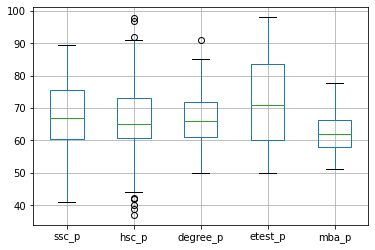

In [25]:
encoded_data.boxplot(column=numeric_feature)

Higher Number of Outliers in HSC Percentage

In [26]:
Q1 = encoded_data['hsc_p'].quantile(0.25)
Q3 = encoded_data['hsc_p'].quantile(0.75)
IQR = Q3 - Q1    

filter = (encoded_data['hsc_p'] >= Q1 - 1.5 * IQR) & (encoded_data['hsc_p'] <= Q3 + 1.5 *IQR)
filtered_data=encoded_data.loc[filter]

Text(0.5, 1.0, 'After removing outliers(hsc_p)')

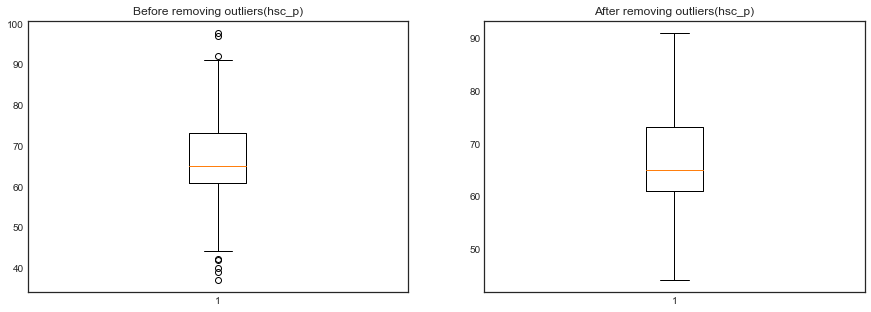

In [27]:
plt.figure(figsize = (15, 5))
plt.style.use('seaborn-white')
ax=plt.subplot(121)
plt.boxplot(encoded_data['hsc_p'])
ax.set_title('Before removing outliers(hsc_p)')
ax=plt.subplot(122)
plt.boxplot(filtered_data['hsc_p'])
ax.set_title('After removing outliers(hsc_p)')

In [28]:
encoded_data.shape,filtered_data.shape

((215, 9), (207, 9))

**Inferences from the DATA**

[Text(0.5, 1.0, 'Influence of Experience in Placement')]

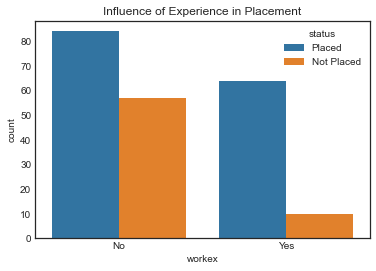

In [29]:
sns.countplot(x = 'workex',hue = "status",data = df).set(title='Influence of Experience in Placement')

This infers that for getting placed word experience doesn't matter but there is a stat that if you got work experience then the change of getting not placed is very less

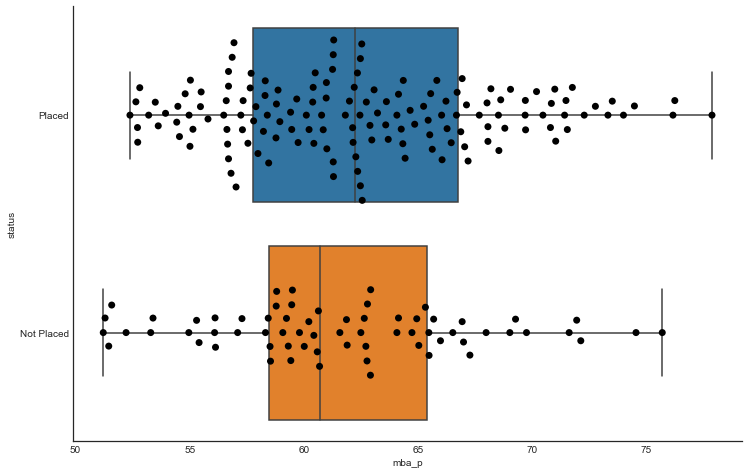

In [30]:
g = sns.boxplot(y = "status",x = 'mba_p',data = df)
g = sns.swarmplot(y = "status",x = 'mba_p',data = df, size = 7,color = 'black')
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

With this we can infer that the degree percentage plays a role in the placements

[Text(0.5, 1.0, 'Influence of Gender in Placement')]

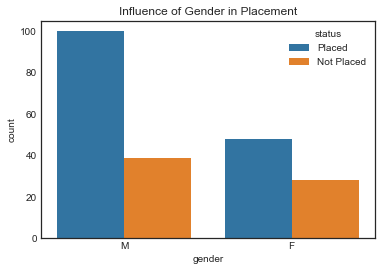

In [31]:
sns.countplot(x = 'gender',hue = "status",data = df).set(title='Influence of Gender in Placement')

So we can clearly see that more no. of males were placed than females. Moreover ratio of male:female placed vs not placed is also high for females as less no. of them have been selected.

**Balancing the dataset using SMOTE**

In [32]:
X=filtered_data.drop(['status'],axis=1)
y=filtered_data.status

In [33]:
r_smote = SMOTE(random_state =0)
r_smote.fit(X,y)
X_smote,y_smote = r_smote.fit_resample(X,y)

In [34]:
print(len(y_smote[y_smote==0]))
print(len(y_smote[y_smote==1]))
len(X_smote)

145
145


290

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote,train_size=0.8,random_state=2021)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (232, 8)
Input Test: (58, 8)
Output Training: (232,)
Output Test: (58,)


In [36]:
X.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p
0,1,67.00,91.00,58.00,0,55.0,1,58.80
1,1,79.33,78.33,77.48,1,86.5,0,66.28
2,1,65.00,68.00,64.00,0,75.0,0,57.80
3,1,56.00,52.00,52.00,0,66.0,1,59.43
4,1,85.80,73.60,73.30,0,96.8,0,55.50


**Model Selection**

Logistic Regression

In [37]:
model=LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [38]:
y_pred=model.predict(X_test)
lr_accuracy=metrics.accuracy_score(y_test,y_pred)
print("accuracy:", metrics.accuracy_score(y_test,y_pred))
print("precision:", metrics.precision_score(y_test,y_pred))
print("recall" , metrics.recall_score(y_test,y_pred))
print('Coefficient of determination: ',metrics.r2_score(y_test,y_pred))
print('Confusion Matrix')
print(metrics.confusion_matrix(y_test,y_pred))

accuracy: 0.896551724137931
precision: 0.9032258064516129
recall 0.9032258064516129
Coefficient of determination:  0.5842293906810035
Confusion Matrix
[[24  3]
 [ 3 28]]


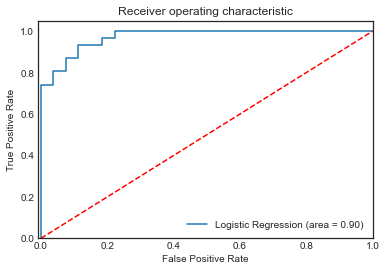

In [39]:
logit_roc_auc = metrics.roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Decision Trees

In [40]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt = dt.fit(X_train,y_train)

In [41]:
y_pred=dt.predict(X_test)
decision_tree_accuracy=metrics.accuracy_score(y_test,y_pred)
print("accuracy:", metrics.accuracy_score(y_test,y_pred))
print("precision:", metrics.precision_score(y_test,y_pred))
print("recall" , metrics.recall_score(y_test,y_pred))
print('Coefficient of determination: ',metrics.r2_score(y_test,y_pred))
print('Confusion Matrix')
print(metrics.confusion_matrix(y_test,y_pred))

accuracy: 0.7586206896551724
precision: 0.7297297297297297
recall 0.8709677419354839
Coefficient of determination:  0.029868578255674905
Confusion Matrix
[[17 10]
 [ 4 27]]


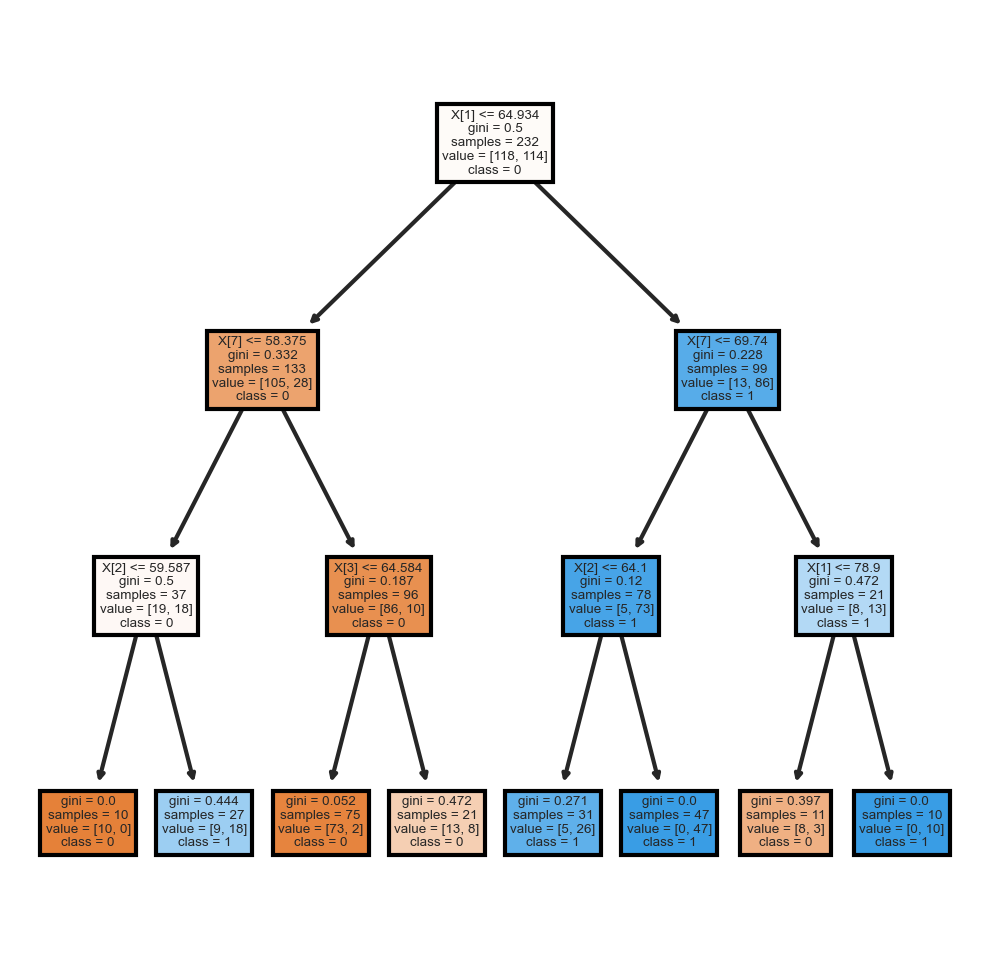

In [41]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
temp=tree.plot_tree(dt,class_names=['0','1'],filled = True)

Random Forest

In [42]:
rt=RandomForestClassifier(n_estimators=100)
rt.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
y_pred=rt.predict(X_test)
random_forest_accuracy=metrics.accuracy_score(y_test,y_pred)
print("accuracy:", metrics.accuracy_score(y_test,y_pred))
print("precision:", metrics.precision_score(y_test,y_pred))
print("recall" , metrics.recall_score(y_test,y_pred))
print('Coefficient of determination: ',metrics.r2_score(y_test,y_pred))
print('Confusion Matrix')
print(metrics.confusion_matrix(y_test,y_pred))

accuracy: 0.8793103448275862
precision: 0.8333333333333334
recall 0.967741935483871
Coefficient of determination:  0.5149342891278375
Confusion Matrix
[[21  6]
 [ 1 30]]


Text(0.5, 1.0, 'Visualizing Important Features')

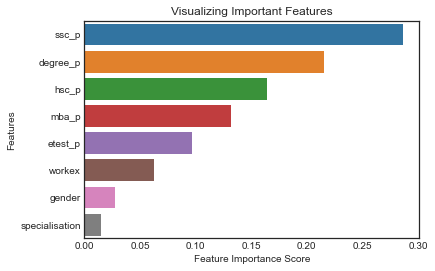

In [44]:
feature_imp = pd.Series(rt.feature_importances_,index=X.columns).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

K Nearest Neighbours

In [45]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [46]:
y_pred=knn.predict(X_test)
knn_accuracy=metrics.accuracy_score(y_test,y_pred)
print("accuracy:", metrics.accuracy_score(y_test,y_pred))
print("precision:", metrics.precision_score(y_test,y_pred))
print("recall" , metrics.recall_score(y_test,y_pred))
print('Coefficient of determination: ',metrics.r2_score(y_test,y_pred))
print('Confusion Matrix')
print(metrics.confusion_matrix(y_test,y_pred))

accuracy: 0.8620689655172413
precision: 0.8285714285714286
recall 0.9354838709677419
Coefficient of determination:  0.44563918757467136
Confusion Matrix
[[21  6]
 [ 2 29]]


Support Vector Machine

In [47]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [48]:
y_pred=svclassifier.predict(X_test)
svc_accuracy=metrics.accuracy_score(y_test,y_pred)
print("accuracy:", metrics.accuracy_score(y_test,y_pred))
print("precision:", metrics.precision_score(y_test,y_pred))
print("recall" , metrics.recall_score(y_test,y_pred))
print('Coefficient of determination: ',metrics.r2_score(y_test,y_pred))
print('Confusion Matrix')
print(metrics.confusion_matrix(y_test,y_pred))

accuracy: 0.9137931034482759
precision: 0.9333333333333333
recall 0.9032258064516129
Coefficient of determination:  0.6535244922341696
Confusion Matrix
[[25  2]
 [ 3 28]]


In [49]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Decision Tree','Random Forest', 'Logistic Regression'],
    'Score': [svc_accuracy, knn_accuracy,decision_tree_accuracy, random_forest_accuracy, lr_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,0.913793
4,Logistic Regression,0.896552
3,Random Forest,0.879310
1,KNN,0.862069
2,Decision Tree,0.758621


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='Model', ylabel='Score'>

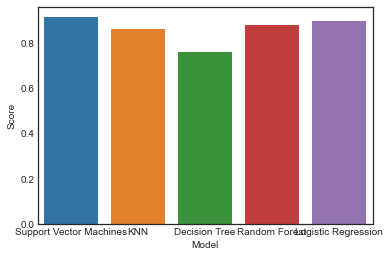

In [50]:
sns.barplot(models['Model'],models['Score'])

**Finding the True error for the above models using cross validation**

Support Vector machine

In [51]:
svclassifier = SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(svclassifier, X, y, cv=5)
svc_accuracy=scores.mean()

print(scores)
print('The model accuracy is ',scores.mean())

[0.80952381 0.80952381 0.90243902 0.87804878 0.87804878]
The model accuracy is  0.8555168408826945


Logistic Regression

In [52]:
model=LogisticRegression(max_iter=10000)
scores = cross_val_score(model, X, y, cv=5)
lr_accuracy=scores.mean()

print(scores)
print('The model accuracy is ',scores.mean())

[0.80952381 0.76190476 0.90243902 0.87804878 0.90243902]
The model accuracy is  0.8508710801393728


K Nearest Neighbour

In [53]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
scores = cross_val_score(knn, X, y, cv=5)
knn_accuracy=scores.mean()

print(scores)
print('The model accuracy is ',scores.mean())

[0.85714286 0.78571429 0.87804878 0.7804878  0.82926829]
The model accuracy is  0.8261324041811846


Random Forest

In [54]:
rt=RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rt, X, y, cv=5)
random_forest_accuracy=scores.mean()

print(scores)
print('The model accuracy is ',scores.mean())

[0.88095238 0.78571429 0.87804878 0.85365854 0.75609756]
The model accuracy is  0.8308943089430894


Decision Tree

In [55]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=3)
scores = cross_val_score(dt, X, y, cv=5)
decision_tree_accuracy=scores.mean()

print(scores)
print('The model accuracy is ',scores.mean())

[0.73809524 0.73809524 0.80487805 0.7804878  0.82926829]
The model accuracy is  0.7781649245063879


In [56]:
models_withcv = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Decision Tree','Random Forest', 'Logistic Regression'],
    'Score': [svc_accuracy, knn_accuracy,decision_tree_accuracy, random_forest_accuracy, lr_accuracy]})
models_withcv.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,0.855517
4,Logistic Regression,0.850871
3,Random Forest,0.830894
1,KNN,0.826132
2,Decision Tree,0.778165


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='Model', ylabel='Score'>

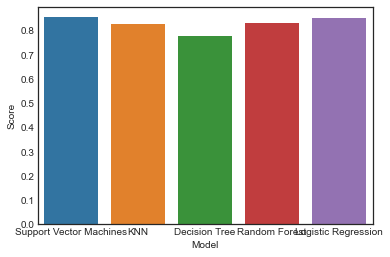

In [57]:
sns.barplot(models_withcv['Model'],models_withcv['Score'])

Lets take the logistic regression which has 85% True error

**Performing Hyperparameter tuning for the best model**

In [58]:
model = LogisticRegression(max_iter=10000)
grid={
'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
'penalty':['l1', 'l2', 'elasticnet'],
'C':[100, 10, 1,1.0, 0.1, 0.01,0.001],
'multi_class':['auto', 'ovr', 'multinomial']
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
lrc = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (lrc.best_score_, lrc.best_params_))

means =lrc.cv_results_['mean_test_score']
stds =lrc.cv_results_['std_test_score']
params =lrc.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.880857 using {'C': 1, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'lbfgs'}
0.877778 (0.068141) with: {'C': 100, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'sag'}
0.870833 (0.053912) with: {'C': 100, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}
0.877778 (0.068141) with: {'C': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}
0.877778 (0.068141) with: {'C': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}
0.876389 (0.067605) with: {'C': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}
0.872343 (0.055121) with: {'C': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'sag'}
0.870833 (0.053912) with: {'C'

After applying Hyperparameter Tuning our logistic regression model can able to perform up to 88%

**Adding XAI for the model for finding the feature importance during inference**

Using **SHAP** explains how each feature impacts the output of the model

In [59]:
lrc=LogisticRegression(max_iter=10000,C=1, multi_class='auto',penalty='l2',solver='newton-cg')
lrc.fit(X_train,y_train)

explainer = shap.LinearExplainer(lrc, X_train,feature_names=X.columns)
shap_values = explainer.shap_values(X)

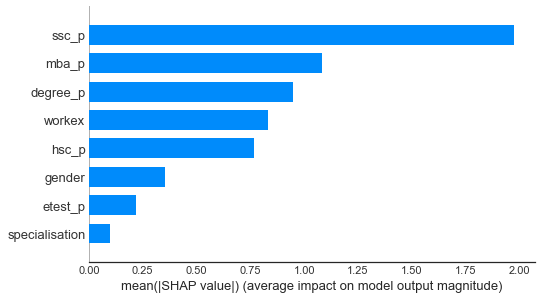

In [61]:
shap.summary_plot(shap_values, X.values, plot_type="bar", class_names=['Placed','Not Placed'], feature_names = X.columns)

In this plot the impact of a feature on the output are stacked to create the feature importance plot. In other words summary plot can show you what the machine managed to learn from the features.

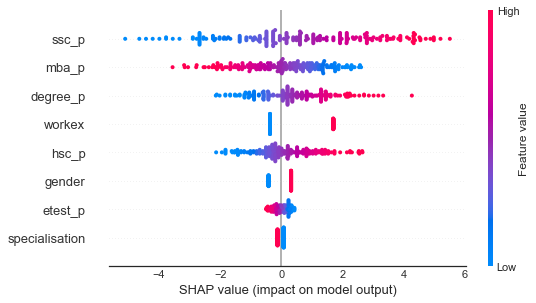

In [62]:
shap.summary_plot(shap_values, X.values, feature_names = X.columns)

This summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. You can see that the feature pkts_sent, being the least important feature, has low Shapley values. The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

In [63]:
shap.initjs()
i=3
shap.force_plot(explainer.expected_value, shap_values[i], X.values[i], feature_names = X.columns)

The numbers on the plot arrows are the value of the feature for this instance.

Red representing features that pushed the model score higher, and blue representing features that pushed the score lower.

The bigger the arrow, the bigger the impact of the feature on the output. The amount of decrease or increase in the impact can be seen in the x axis.

For example mba percentage tries to increase the chance but since the candidate scored only 56 in his ssc percentage he looses his chance.

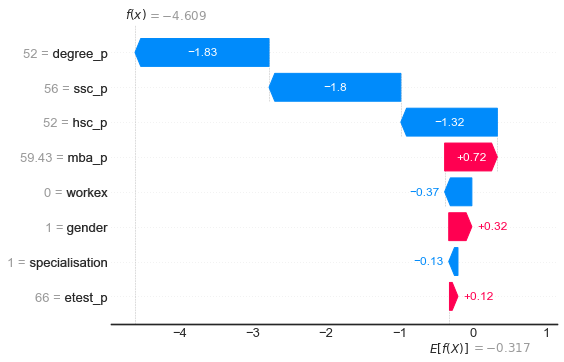

In [64]:
shap.waterfall_plot(shap.Explanation(values=shap_values[i], 
                                              base_values=explainer.expected_value, data=X.values[i],  
                                         feature_names=X.columns))

On the left are the features value and on the arrows the feature contribution to the prediction.

Each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction.

In [65]:
print(X.loc[i,:])
print(y.loc[i])

gender             1.00
ssc_p             56.00
hsc_p             52.00
degree_p          52.00
workex             0.00
etest_p           66.00
specialisation     1.00
mba_p             59.43
Name: 3, dtype: float64
0


The actual values and the true output for this particular instance

We can straight away see that shap value model interpretability is very effective. It explains the variable contribution in additive sense which is easier to grasp and also shows which variables are influencing the decision

**Test the model for Unseen Data**

In [66]:
temp=np.array([1, 10.0, 10.0, 12.0, 0, 9.0, 1, 50.0])
temp.shape
shap_values = explainer.shap_values(temp)

In [67]:
lrc.predict(np.reshape(temp,(1,8)))

array([0])

In [68]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, temp, feature_names = X.columns)

**Conclusion**

From the interpretation of the model by XAI we can clearly see the importance of each features in predicitng the status of an candidate in placements. After analysing few algorithms we came to a conclusion that Logistic Regression gave a good results which we will use for deployment of our model.

**Deploying the model using heroku**

In [70]:
file=open('logistic_regression.pkl','wb')
pickle.dump(lrc,file)

The model was deployed in heroku app 
Link: 

**Future Improvementations**

Use regression models to find the likely salary for the candidate if placed

**References**

1. https://www.kaggle.com/jinxzed/interpreting-logistic-regression-using-shap
2. https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Sentiment%20Analysis%20with%20Logistic%20Regression.html
3. https://towardsdatascience.com/explainable-ai-xai-with-shap-multi-class-classification-problem-64dd30f97cea
4. https://scikit-learn.org/stable/modules/cross_validation.html
5. https://www.kaggle.com/benroshan/you-re-hired-analysis-on-campus-recruitment-data
6. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
7. https://www.youtube.com/watch?v=y4EMEpEnElQ&list=WL&index=20&t=4256s
8. https://www.youtube.com/watch?v=p_tpQSY1aTs&list=WL&index=19&t=4387s